In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('covid-hospitalizations.csv')
df.head()

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.390
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.502
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000


In [3]:
# check null values
df.isnull().sum()

entity       0
iso_code     0
date         0
indicator    0
value        0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

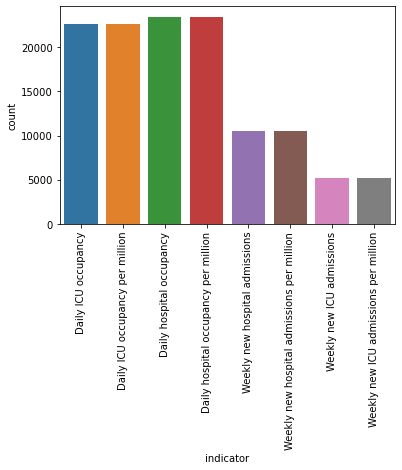

In [4]:
sns.countplot(df['indicator'])
plt.xticks(rotation=90)

In [5]:
# Check total number of countries in this data
total = list(df['entity'].unique())
print("Total Number of Countries :", len(total))

Total Number of Countries : 47


## How to Analyze this Covid Hospitalization Data?

#### Monitoring Data for all the 47 countries cannot help us to get to any conclusion. Also weekly data cannot help in understanding numbers accurately as the data is being monitored daily. 

#### The following mentioned statistics can be helpful to analyze the covid situation of given 47 countries.

- Top 10 countries that have seen highest values of daily hospital occupancy
- Top 10 countries that have seen highest values of daily ICU occupancy

In [6]:
# Setting up color palette for visualizations
cols = sns.color_palette("rocket")

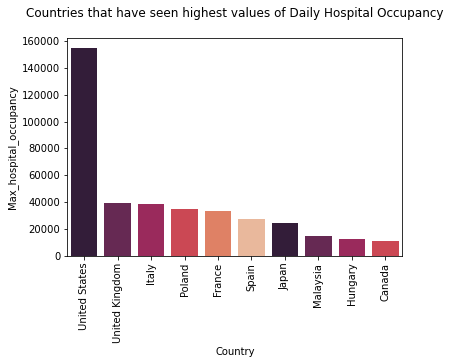

In [7]:
# Function to check Countries that have seen highest values of Daily Hospital Occupancy
def top5_hospital_occupancy():
    df_hospital = df[df['indicator']=='Daily hospital occupancy']
    countries=list(df_hospital['entity'].unique())
    max_val=[]
    for i in range(len(countries)):
        dfnew = df_hospital[df_hospital['entity']==countries[i]]
        max_val.append(dfnew['value'].max())
        dfnew=dfnew.loc[0:]
    data = list(zip(countries, max_val))
    daily_hos = pd.DataFrame(data=data, columns=['Country', 'Max_hospital_occupancy'])
    sns.barplot(x='Country', y='Max_hospital_occupancy', data=daily_hos, palette=cols, 
                order=daily_hos.sort_values('Max_hospital_occupancy',ascending = False).Country.iloc[:10])
    plt.title('Countries that have seen highest values of Daily Hospital Occupancy\n')
    plt.xticks(rotation=90)
    
top5_hospital_occupancy()

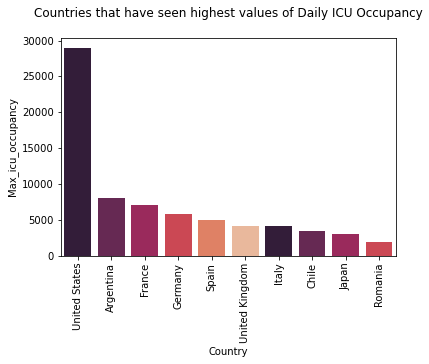

In [8]:
# Function to check Countries that have seen highest values of Daily ICU Occupancy
def top5_icu_occupancy():
    df_icu = df[df['indicator']=='Daily ICU occupancy']
    countries=list(df_icu['entity'].unique())
    max_val=[]
    for i in range(len(countries)):
        dfnew = df_icu[df_icu['entity']==countries[i]]
        max_val.append(dfnew['value'].max())
        dfnew=dfnew.loc[0:]
    data = list(zip(countries, max_val))
    daily_hos = pd.DataFrame(data=data, columns=['Country', 'Max_icu_occupancy'])
    sns.barplot(x='Country', y='Max_icu_occupancy', data=daily_hos, palette=cols, 
                order=daily_hos.sort_values('Max_icu_occupancy',ascending = False).Country.iloc[:10])
    plt.title('Countries that have seen highest values of Daily ICU Occupancy\n')
    plt.xticks(rotation=90)
    
top5_icu_occupancy()

#### The graveness of situation can be understood on a common scale. A country with 50% population affected is has worse situation (even if the total number of cases are less) as the amenities in any country is based on the total population . Therefore, how badly were these countries were affected can be better displayed by per million values.

#### The following mentioned statistics can be helpful to analyze the covid situation of given 47 countries.

- Top 10 countries that have seen highest values of daily hospital occupancy
- Top 10 countries that have seen highest values of daily ICU occupancy

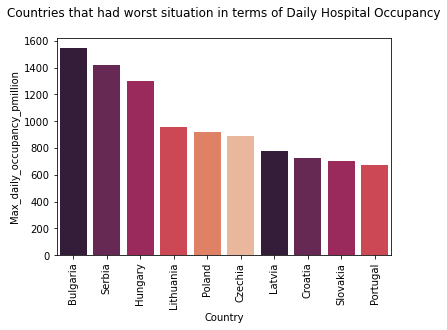

In [9]:
# Function to check Countries that had worst situation in terms of Daily Hospital Occupancy (per million)
def top5_hospital_occupancy_pmillion():
    df_hospmil = df[df['indicator']=='Daily hospital occupancy per million']
    countries=list(df_hospmil['entity'].unique())
    max_val=[]
    for i in range(len(countries)):
        dfnew = df_hospmil[df_hospmil['entity']==countries[i]]
        max_val.append(dfnew['value'].max())
        dfnew=dfnew.loc[0:]
    data = list(zip(countries, max_val))
    daily_hos = pd.DataFrame(data=data, columns=['Country', 'Max_daily_occupancy_pmillion'])
    sns.barplot(x='Country', y='Max_daily_occupancy_pmillion', data=daily_hos, palette=cols, 
                order=daily_hos.sort_values('Max_daily_occupancy_pmillion',ascending = False).Country.iloc[:10])
    plt.title('Countries that had worst situation in terms of Daily Hospital Occupancy\n')
    plt.xticks(rotation=90)
    
top5_hospital_occupancy_pmillion()

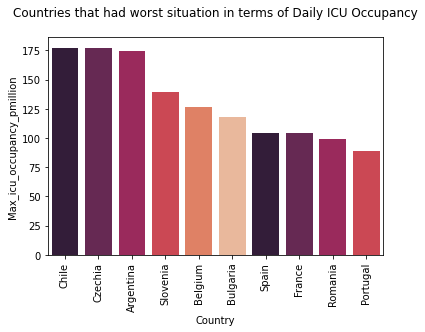

In [10]:
# Function to check Countries that had worst situation in terms of Daily ICU Occupancy (per million)
def top5_icu_occupancy_pmillion():
    df_icupmil = df[df['indicator']=='Daily ICU occupancy per million']
    countries=list(df_icupmil['entity'].unique())
    max_val=[]
    for i in range(len(countries)):
        dfnew = df_icupmil[df_icupmil['entity']==countries[i]]
        max_val.append(dfnew['value'].max())
        dfnew=dfnew.loc[0:]
    data = list(zip(countries, max_val))
    daily_hos = pd.DataFrame(data=data, columns=['Country', 'Max_icu_occupancy_pmillion'])
    sns.barplot(x='Country', y='Max_icu_occupancy_pmillion', data=daily_hos, palette=cols, 
                order=daily_hos.sort_values('Max_icu_occupancy_pmillion',ascending = False).Country.iloc[:10])
    plt.title('Countries that had worst situation in terms of Daily ICU Occupancy\n')
    plt.xticks(rotation=90)
    
top5_icu_occupancy_pmillion()

Enter name of the country United States


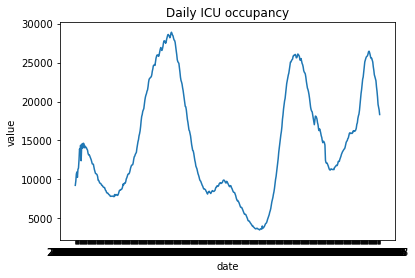

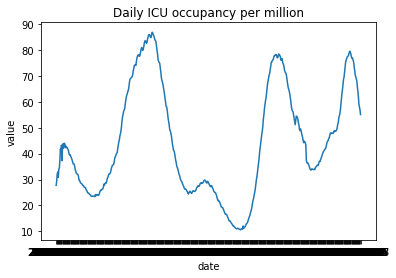

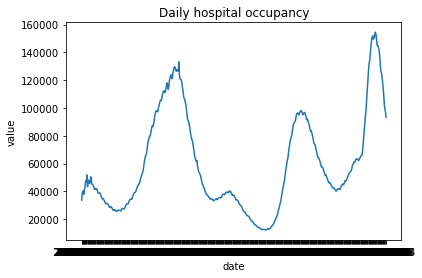

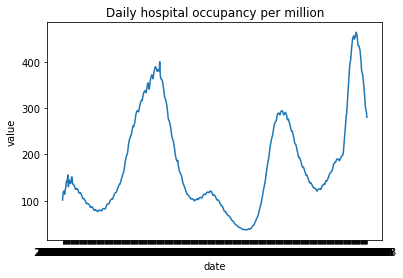

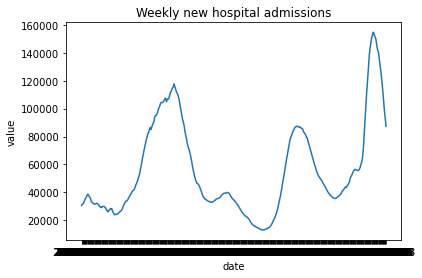

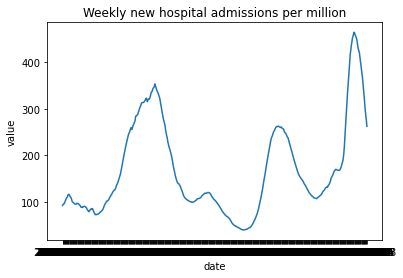

In [11]:
# Function to check statistics of a particular country
def country_stats(country):
    if country not in list(df['entity'].unique()):
        print("We don't have data for this country")
    data = df[df['entity']==country]
    indicators = list(data['indicator'].unique())
    for i in range(len(indicators)):
        dfi = data[data['indicator']==indicators[i]]
        sns.lineplot(data=dfi, x='date', y='value')
        plt.title(indicators[i])
        plt.show()
    
country = input("Enter name of the country ")
country_stats(country)